In [1]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches


## Single frame plotting
Practice plotting a single frame

In [2]:
# Load a play dataset
tracking_file = "../data/tracking_week_1.csv"
lazy_df = pl.scan_csv(tracking_file, ignore_errors=True)

sample_play_frame = lazy_df.filter(
    (pl.col("gameId") == 2022091200) & 
    (pl.col("playId") == 64) & 
    (pl.col("frameId") == 30)
).collect()

sample_play_frame.head(5)

gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
i64,i64,i64,str,i64,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str
2022091200,64,35459,"""Kareem Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",22,"""DEN""","""right""",52.19,28.94,0.05,0.56,0.01,231.72,96.9,"""NA"""
2022091200,64,39987,"""Geno Smith""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",7,"""SEA""","""right""",34.97,23.87,0.67,0.38,0.07,86.94,67.88,"""NA"""
2022091200,64,41310,"""Gabe Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",66,"""SEA""","""right""",38.6,22.37,0.29,0.78,0.03,85.7,81.48,"""NA"""
2022091200,64,42393,"""Ronald Darby""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",23,"""DEN""","""right""",45.05,15.36,1.64,1.25,0.17,278.52,171.25,"""NA"""
2022091200,64,42403,"""Randy Gregory""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",5,"""DEN""","""right""",41.01,18.8,0.39,0.3,0.04,254.59,260.32,"""NA"""


In [3]:
sample_play_frame.shape

(23, 18)

In [4]:
MIN_X = 0
MIN_Y = 0
MAX_X = 120
MAX_Y = 160/3

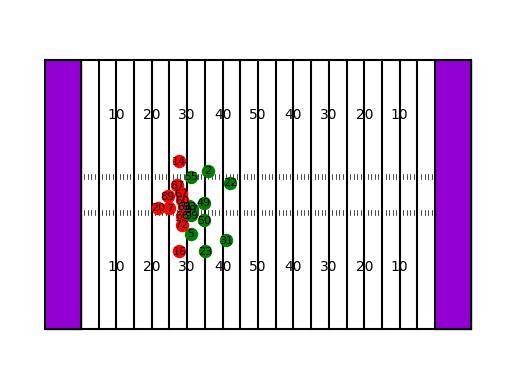

In [5]:
# Create a figure
fig = plt.figure()

# Create limits
plt.xlim(MIN_X - 10, MAX_X + 10)
plt.ylim(MIN_Y - 10, MAX_Y + 10) 

# Colour the endzones
endzone1 = patches.Rectangle((0,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
endzone2 = patches.Rectangle((110,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

plt.gca().add_patch(endzone1)
plt.gca().add_patch(endzone2)

# Draw field outline
plt.plot([0,120], [0,0], color="black")
plt.plot([0,120], [160/3,160/3], color="black")
plt.plot([0,0], [0,160/3], color="black")
plt.plot([120,120], [0,160/3], color="black")

# Draw yard lines
for x in range(10,115,5):
    plt.plot([x,x], [0,160/3], color="black")

# Draw hash marks
for x in range(10,110,1):
    plt.plot([x,x], [160/6 - 3.0833 - 1, 160/6 - 3.0833], color="black", linewidth=0.5)
    plt.plot([x,x], [160/6 + 3.0833 + 1, 160/6 + 3.0833], color="black", linewidth=0.5)
    
# Draw the yard numbers
for x in range(10,50,10):
    plt.text(x+10, 160/6 - 3.0833 - 12, str(x), fontsize=10, color="black", ha='center')
    plt.text(x+10, 160/6 + 3.0833 + 12, str(x), fontsize=10, color="black", ha='center')
    plt.text(110-x, 160/6 - 3.0833 - 12, str(x), fontsize=10, color="black", ha='center')
    plt.text(110-x, 160/6 + 3.0833 + 12, str(x), fontsize=10, color="black", ha='center')
plt.text(60, 160/6 - 3.0833 - 12, "50", fontsize=10, color="black", ha='center')
plt.text(60, 160/6 + 3.0833 + 12, "50", fontsize=10, color="black", ha='center')

# Add the players

players = sample_play_frame.filter(pl.col("club") != "football")
unique_teams = players.select(pl.col("club").unique())

football = sample_play_frame.filter(pl.col("club") == "football")

team_colors = {
    unique_teams.item(0,0): "red", 
    unique_teams.item(1,0): "green",
    "football": "brown"
}

players = players.with_columns(
    colors=pl.col("club").replace(team_colors)
)

for row in players.iter_rows(named=True):
    plt.scatter(row["x"], row["y"], color=row["colors"], s=75, zorder=3)
    plt.text(row["x"], row["y"], row["jerseyNumber"], fontsize=8, ha='center', va='center', zorder=4)

# Plot the football
plt.scatter(football["x"][0], football["y"][0], color="brown", s=50, zorder=3)

# Hide pltes
plt.axis('off')

fig.show()

In [6]:
sample_play_frame["y"].min()

15.3

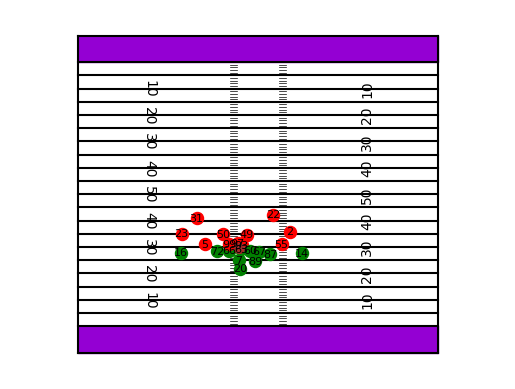

In [7]:
# Create a figure
fig = plt.figure()

# Create limits
plt.xlim(MIN_Y - 10, MAX_Y + 10)
plt.ylim(MIN_X - 10, MAX_X + 10) 

# Colour the endzones
endzone1 = patches.Rectangle((0,0), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
endzone2 = patches.Rectangle((0,110), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

plt.gca().add_patch(endzone1)
plt.gca().add_patch(endzone2)

# Draw field outline
plt.plot([0,0], [0,120], color="black")
plt.plot([0,160/3], [0, 0], color="black")
plt.plot([160/3,0], [120, 120], color="black")
plt.plot([160/3,160/3], [120,0], color="black")

# Draw yard lines
for y in range(10,115,5):
    plt.plot([0,160/3], [y,y], color="black")

# Draw hash marks
for y in range(10,110,1):
    plt.plot([160/6 - 3.0833 - 1, 160/6 - 3.0833], [y,y], color="black", linewidth=0.5)
    plt.plot([160/6 + 3.0833 + 1, 160/6 + 3.0833], [y,y], color="black", linewidth=0.5)
    
# Draw the yard numbers
for y in range(10,50,10):
    plt.text(160/6 - 3.0833 - 12, y+10, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
    plt.text(160/6 + 3.0833 + 12, y+10, str(y), fontsize=10, color="black", ha='left', va="center", rotation=90)
    plt.text(160/6 - 3.0833 - 12, 110-y, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
    plt.text(160/6 + 3.0833 + 12, 110-y, str(y), fontsize=10, color="black", ha='left',va="center", rotation=90)
plt.text(160/6 - 3.0833 - 12, 60, "50", fontsize=10, color="black", ha='right', va="center", rotation=-90)
plt.text(160/6 + 3.0833 + 12, 60, "50", fontsize=10, color="black", ha='left', va="center", rotation=90)

# Add the players

players = sample_play_frame.filter(pl.col("club") != "football")
unique_teams = players.select(pl.col("club").unique())

football = sample_play_frame.filter(pl.col("club") == "football")

team_colors = {
    unique_teams.item(0,0): "red", 
    unique_teams.item(1,0): "green",
    "football": "brown"
}

players = players.with_columns(
    colors=pl.col("club").replace(team_colors)
)

for row in players.iter_rows(named=True):
    plt.scatter(row["y"], row["x"], color=row["colors"], s=75, zorder=3)
    plt.text(row["y"], row["x"], row["jerseyNumber"], fontsize=8, ha='center', va='center', zorder=4, clip_on=True)

# Plot the football
plt.scatter(football["y"][0], football["x"][0], color="brown", s=50, zorder=3)

# Hide axis
plt.axis('off')

fig.show()

In [57]:

class PlotPlayFrameVertical():
    def __init__(self, frame_df):
        self.frame_df = frame_df
        self.min_x = MIN_X
        self.min_y = MIN_Y
        self.max_x = MAX_X
        self.max_y = MAX_Y
        self.colour1 = "red"
        self.colour2 = "green"
        self.ball_colour = "brown"
        self.fig, self.ax = plt.subplots()
        plt.close(self.fig) # Don't display empty plot immediately in Jupyter notebook

    def _create_team_colours_dict(self):
        unique_teams = self.frame_df.filter(pl.col("club") != "football").select(pl.col("club").unique()).sort("club")
        team_colours = {
            unique_teams.item(0,0): self.colour1, 
            unique_teams.item(1,0): self.colour2,
            "football": self.ball_colour
        }
        return team_colours
    
    def _plot_field(self):
        # Create limits
        self.ax.set_xlim(MIN_Y - 10, MAX_Y + 10)
        self.ax.set_ylim(MIN_X - 10, MAX_X + 10) 

        # Colour the endzones
        endzone1 = patches.Rectangle((0,0), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
        endzone2 = patches.Rectangle((0,110), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

        self.ax.add_patch(endzone1)
        self.ax.add_patch(endzone2)

        # Draw field outline
        self.ax.plot([0,0], [0,120], color="black")
        self.ax.plot([0,160/3], [0, 0], color="black")
        self.ax.plot([160/3,0], [120, 120], color="black")
        self.ax.plot([160/3,160/3], [120,0], color="black")

        # Draw yard lines
        for y in range(10,115,5):
            self.ax.plot([0,160/3], [y,y], color="black")

        # Draw hash marks
        for y in range(10,110,1):
            self.ax.plot([160/6 - 3.0833 - 1, 160/6 - 3.0833], [y,y], color="black", linewidth=0.5)
            self.ax.plot([160/6 + 3.0833 + 1, 160/6 + 3.0833], [y,y], color="black", linewidth=0.5)
            
        # Draw the yard numbers
        for y in range(10,50,10):
            self.ax.text(160/6 - 3.0833 - 12, y+10, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
            self.ax.text(160/6 + 3.0833 + 12, y+10, str(y), fontsize=10, color="black", ha='left', va="center", rotation=90)
            self.ax.text(160/6 - 3.0833 - 12, 110-y, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
            self.ax.text(160/6 + 3.0833 + 12, 110-y, str(y), fontsize=10, color="black", ha='left',va="center", rotation=90)
        self.ax.text(160/6 - 3.0833 - 12, 60, "50", fontsize=10, color="black", ha='right', va="center", rotation=-90)
        self.ax.text(160/6 + 3.0833 + 12, 60, "50", fontsize=10, color="black", ha='left', va="center", rotation=90)

        self.ax.axis('off')

    def _plot_players(self):
        # Add the players
        players = self.frame_df.filter(pl.col("club") != "football")
        football = self.frame_df.filter(pl.col("club") == "football")

        team_colours = self._create_team_colours_dict()
        
        players = players.with_columns(
            colours=pl.col("club").replace(team_colours)
        )

        for row in players.iter_rows(named=True):
            self.ax.scatter(row["y"], row["x"], color=row["colours"], s=75, zorder=3)
            self.ax.text(row["y"], row["x"], row["jerseyNumber"], fontsize=8, ha='center', va='center', zorder=4, clip_on=True)

        # Plot the football
        self.ax.scatter(football["y"][0], football["x"][0], color="brown", s=50, zorder=3)


    def plot_frame(self):
        self._plot_field()
        self._plot_players()
        self.fig.show()
        return self.fig
    

In [58]:
vertical_class = PlotPlayFrameVertical(sample_play_frame)

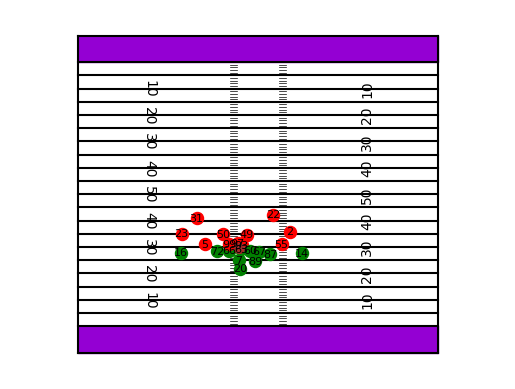

In [59]:
vertical_class.plot_frame()

## Animation
Now try to create an animated plot

In [55]:
sample_play = lazy_df.filter(
    (pl.col("gameId") == 2022091200) & 
    (pl.col("playId") == 64)
).collect()

print(sample_play.shape)
sample_play.head(5)

(3749, 18)


gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
i64,i64,i64,str,i64,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str
2022091200,64,35459,"""Kareem Jackson""",1,"""BEFORE_SNAP""","""2022-09-13 00:16:03.5""",22,"""DEN""","""right""",51.06,28.55,0.72,0.37,0.07,246.17,68.34,"""huddle_break_offense"""
2022091200,64,35459,"""Kareem Jackson""",2,"""BEFORE_SNAP""","""2022-09-13 00:16:03.6""",22,"""DEN""","""right""",51.13,28.57,0.71,0.36,0.07,245.41,71.21,"""NA"""
2022091200,64,35459,"""Kareem Jackson""",3,"""BEFORE_SNAP""","""2022-09-13 00:16:03.7""",22,"""DEN""","""right""",51.2,28.59,0.69,0.23,0.07,244.45,69.9,"""NA"""
2022091200,64,35459,"""Kareem Jackson""",4,"""BEFORE_SNAP""","""2022-09-13 00:16:03.8""",22,"""DEN""","""right""",51.26,28.62,0.67,0.22,0.07,244.45,67.98,"""NA"""
2022091200,64,35459,"""Kareem Jackson""",5,"""BEFORE_SNAP""","""2022-09-13 00:16:03.9""",22,"""DEN""","""right""",51.32,28.65,0.65,0.34,0.07,245.74,62.83,"""NA"""


In [81]:
# Plotting functions for tracking data
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

MIN_X = 0
MIN_Y = 0
MAX_X = 120
MAX_Y = 160/3

class PlotPlay():
    def __init__(self, play_df):
        self.play_df = play_df
        self.min_x = MIN_X
        self.min_y = MIN_Y
        self.max_x = MAX_X
        self.max_y = MAX_Y
        self.colour1 = "red"
        self.colour2 = "green"
        self.ball_colour = "brown"
        self.fig, self.ax = plt.subplots()
        plt.close()


    def _get_play_frame(self, frame_id):
        return self.play_df.filter(pl.col("frameId") == frame_id)
    
    def _create_team_colours_dict(self):
        unique_teams = self.play_df.filter(pl.col("club") != "football").select(pl.col("club").unique()).sort("club")
        team_colours = {
            unique_teams.item(0,0): self.colour1, 
            unique_teams.item(1,0): self.colour2,
            "football": self.ball_colour
        }
        return team_colours
    
    def _plot_field(self):
        pass

    def _plot_players_for_frame(self, frame_id):
        pass

    def plot_frame(self, frame_id):
        pass


class PlotPlayHorizontal(PlotPlay):
    def __init__(self, play_df):
        super().__init__(play_df)
    
    def _plot_field(self):
        
        # Create limits
        self.ax.set_xlim(self.min_x - 10, self.max_x + 10)
        self.ax.set_ylim(self.min_y - 10, self.max_y + 10) 

        # Colour the endzones
        endzone1 = patches.Rectangle((0,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
        endzone2 = patches.Rectangle((110,0), 10, 160/3, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

        self.ax.add_patch(endzone1)
        self.ax.add_patch(endzone2)

        # Draw field outline
        self.ax.plot([0,120], [0,0], color="black")
        self.ax.plot([0,120], [160/3,160/3], color="black")
        self.ax.plot([0,0], [0,160/3], color="black")
        self.ax.plot([120,120], [0,160/3], color="black")

        # Draw yard lines
        for x in range(10,115,5):
            self.ax.plot([x,x], [0,160/3], color="black")

        # Draw hash marks
        for x in range(10,110,1):
            self.ax.plot([x,x], [160/6 - 3.0833 - 1, 160/6 - 3.0833], color="black", linewidth=0.5)
            self.ax.plot([x,x], [160/6 + 3.0833 + 1, 160/6 + 3.0833], color="black", linewidth=0.5)
            
        # Draw the yard numbers
        for x in range(10,50,10):
            self.ax.text(x+10, 160/6 - 3.0833 - 12, str(x), fontsize=10, color="black", ha='center')
            self.ax.text(x+10, 160/6 + 3.0833 + 12, str(x), fontsize=10, color="black", ha='center')
            self.ax.text(110-x, 160/6 - 3.0833 - 12, str(x), fontsize=10, color="black", ha='center')
            self.ax.text(110-x, 160/6 + 3.0833 + 12, str(x), fontsize=10, color="black", ha='center')
        self.ax.text(60, 160/6 - 3.0833 - 12, "50", fontsize=10, color="black", ha='center')
        self.ax.text(60, 160/6 + 3.0833 + 12, "50", fontsize=10, color="black", ha='center')

        self.ax.axis('off')

    def _plot_players_for_frame(self, frame_id):
        # Get the frame df
        frame_df = self._get_play_frame(frame_id)

        # Add the players
        players = frame_df.filter(pl.col("club") != "football")
        football = frame_df.filter(pl.col("club") == "football")

        team_colours = self._create_team_colours_dict()
        
        players = players.with_columns(
            colours=pl.col("club").replace(team_colours)
        )

        for row in players.iter_rows(named=True):
            self.ax.scatter(row["x"], row["y"], color=row["colours"], s=75, zorder=3)
            self.ax.text(row["x"], row["y"], row["jerseyNumber"], fontsize=8, ha='center', va='center', zorder=4)

        # Plot the ball
        self.ax.scatter(football["x"][0], football["y"][0], color="brown", s=50, zorder=3)

    def plot_frame(self, frame_id):
        # Reset the figure
        self.fig, self.ax = plt.subplots()
        plt.close()

        self._plot_field()
        self._plot_players_for_frame(frame_id)
        self.fig.show()
        return self.fig         

class PlotPlayFrameVertical(PlotPlay):
    def __init__(self, play_df):
        super().__init__(play_df)
    
    def _plot_field(self):
        # Create limits
        self.ax.set_xlim(MIN_Y - 10, MAX_Y + 10)
        self.ax.set_ylim(MIN_X - 10, MAX_X + 10) 

        # Colour the endzones
        endzone1 = patches.Rectangle((0,0), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')
        endzone2 = patches.Rectangle((0,110), 160/3, 10, linewidth=1, edgecolor='darkviolet', facecolor='darkviolet')

        self.ax.add_patch(endzone1)
        self.ax.add_patch(endzone2)

        # Draw field outline
        self.ax.plot([0,0], [0,120], color="black")
        self.ax.plot([0,160/3], [0, 0], color="black")
        self.ax.plot([160/3,0], [120, 120], color="black")
        self.ax.plot([160/3,160/3], [120,0], color="black")

        # Draw yard lines
        for y in range(10,115,5):
            self.ax.plot([0,160/3], [y,y], color="black")

        # Draw hash marks
        for y in range(10,110,1):
            self.ax.plot([160/6 - 3.0833 - 1, 160/6 - 3.0833], [y,y], color="black", linewidth=0.5)
            self.ax.plot([160/6 + 3.0833 + 1, 160/6 + 3.0833], [y,y], color="black", linewidth=0.5)
            
        # Draw the yard numbers
        for y in range(10,50,10):
            self.ax.text(160/6 - 3.0833 - 12, y+10, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
            self.ax.text(160/6 + 3.0833 + 12, y+10, str(y), fontsize=10, color="black", ha='left', va="center", rotation=90)
            self.ax.text(160/6 - 3.0833 - 12, 110-y, str(y), fontsize=10, color="black", ha='right', va="center", rotation=-90)
            self.ax.text(160/6 + 3.0833 + 12, 110-y, str(y), fontsize=10, color="black", ha='left',va="center", rotation=90)
        self.ax.text(160/6 - 3.0833 - 12, 60, "50", fontsize=10, color="black", ha='right', va="center", rotation=-90)
        self.ax.text(160/6 + 3.0833 + 12, 60, "50", fontsize=10, color="black", ha='left', va="center", rotation=90)

        self.ax.axis('off')

    def _plot_players_for_frame(self, frame_id):
        # Get the frame df
        frame_df = self._get_play_frame(frame_id)

        # Add the players
        players = frame_df.filter(pl.col("club") != "football")
        football = frame_df.filter(pl.col("club") == "football")

        team_colours = self._create_team_colours_dict()
        
        players = players.with_columns(
            colours=pl.col("club").replace(team_colours)
        )

        for row in players.iter_rows(named=True):
            self.ax.scatter(row["y"], row["x"], color=row["colours"], s=75, zorder=3)
            self.ax.text(row["y"], row["x"], row["jerseyNumber"], fontsize=8, ha='center', va='center', zorder=4, clip_on=True)

        # Plot the football
        self.ax.scatter(football["y"][0], football["x"][0], color="brown", s=50, zorder=3)


    def plot_frame(self, frame_id):
        # Reset the figure
        self.fig, self.ax = plt.subplots()
        plt.close()

        self._plot_field()
        self._plot_players_for_frame(frame_id)
        self.fig.show()
        return self.fig    
    

In [82]:
animated_class = PlotPlayHorizontal(sample_play)

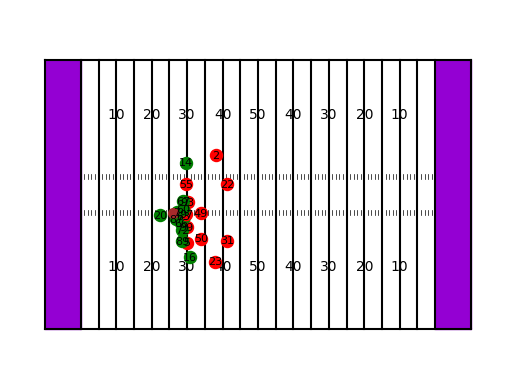

In [86]:
animated_class.plot_frame(120)

In [69]:
vertical_class = PlotPlayVertical(sample_play)

In [70]:
data

gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
i64,i64,i64,str,i64,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str
2022091200,64,35459,"""Kareem Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",22,"""DEN""","""right""",52.19,28.94,0.05,0.56,0.01,231.72,96.9,"""NA"""
2022091200,64,39987,"""Geno Smith""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",7,"""SEA""","""right""",34.97,23.87,0.67,0.38,0.07,86.94,67.88,"""NA"""
2022091200,64,41310,"""Gabe Jackson""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",66,"""SEA""","""right""",38.6,22.37,0.29,0.78,0.03,85.7,81.48,"""NA"""
2022091200,64,42393,"""Ronald Darby""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",23,"""DEN""","""right""",45.05,15.36,1.64,1.25,0.17,278.52,171.25,"""NA"""
2022091200,64,42403,"""Randy Gregory""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",5,"""DEN""","""right""",41.01,18.8,0.39,0.3,0.04,254.59,260.32,"""NA"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022091200,64,52706,"""Jonas Griffith""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",50,"""DEN""","""right""",44.89,21.51,0.29,0.8,0.03,284.89,65.6,"""NA"""
2022091200,64,53438,"""Patrick Surtain""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",2,"""DEN""","""right""",45.82,31.35,2.94,1.03,0.3,308.63,2.83,"""NA"""
2022091200,64,54474,"""Charles Cross""",30,"""BEFORE_SNAP""","""2022-09-13 00:16:06.4""",67,"""SEA""","""right""",38.27,26.88,0.22,0.16,0.02,89.27,131.2,"""NA"""
